# Analysis of the results

This notebook investigates the results of running this analysis.

## Imports and hardcoded variables

In [1]:
import json
import os

import arviz as az
import numpy as np
import pandas as pd
import xarray

from matplotlib import pyplot as plt
from pprint import pprint
from data_preparation import load_prepared_data

INFERENCES_DIR = os.path.join("..", "inferences")
PLOTS_DIR = os.path.join("..", "plots")
DATA_DIR = os.path.join("..", "data", "prepared", "hooman")
ARVIZ_STYLE = "arviz-redish"

plt.style.use(ARVIZ_STYLE)

In [2]:
data = load_prepared_data(DATA_DIR)

## Loading InferenceData objects

The results of the analysis are stored as [`InferenceData`](https://arviz-devs.github.io/arviz/api/generated/arviz.InferenceData.html#arviz.InferenceData) objects in json files. The next cell loads these files.

In [3]:
idatas = {
    d: az.from_json(os.path.join(INFERENCES_DIR, d, "idata.json"))
    for d in os.listdir(INFERENCES_DIR)
    if os.path.isdir(os.path.join(INFERENCES_DIR, d))
}     
idata = idatas["first_try"]
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [4]:
az.summary(idata)

/Users/tedgro/repos/biosustain/growtho/.venv/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
biomass_0[0],0.131,0.008,0.115,0.146,0.000,0.000,2606.0,2696.0,1.0
biomass_0[1],0.136,0.010,0.118,0.155,0.000,0.000,1423.0,2090.0,1.0
biomass_0[2],0.143,0.009,0.127,0.160,0.000,0.000,3048.0,2552.0,1.0
biomass_0[3],0.150,0.009,0.133,0.168,0.000,0.000,2294.0,2336.0,1.0
biomass_0[4],0.150,0.009,0.134,0.168,0.000,0.000,3213.0,2526.0,1.0
...,...,...,...,...,...,...,...,...,...
"conc[7, 5, 1]",0.344,0.077,0.211,0.486,0.001,0.001,4662.0,3359.0,1.0
"conc[7, 6, 0]",38.673,0.281,38.177,39.222,0.004,0.003,4362.0,3588.0,1.0
"conc[7, 6, 1]",0.428,0.098,0.252,0.600,0.001,0.001,4281.0,3298.0,1.0
"conc[7, 7, 0]",39.078,0.281,38.582,39.626,0.004,0.003,3998.0,3353.0,1.0


In [5]:
yconc = data.conc_measurements.join(data.times.set_index("time_ix")["time"], on="time_ix")
ybiomass = data.biomass_measurements.join(data.times.set_index("time_ix")["time"], on="time_ix")

ybiomass.set_index(["reactor", "time"])[["y"]].unstack("reactor")["y"]

reactor,1,2,3,4,5,6,7,8
time,,,,,,,,
0.0,0.113009,0.114165,0.133832,0.152472,0.136052,0.125802,0.121043,0.115466
24.0,0.331166,0.378834,0.370478,0.401496,0.415360,0.381704,0.375986,0.384405
43.5,0.874661,0.827914,0.865320,0.866305,0.973852,0.902936,0.907606,0.867080
44.0,0.834910,0.866305,0.944300,0.918916,1.015949,1.058780,0.962752,0.948007
46.0,0.877447,0.892359,0.940174,0.954206,0.923335,0.950897,0.988471,0.979339
48.0,0.987884,0.909303,1.004723,1.025081,1.145048,1.054947,1.010001,1.026044
52.0,1.268533,1.111181,1.227106,1.156274,1.286482,1.187522,1.355534,1.162075
58.0,1.278565,1.114009,1.399580,1.345712,1.446976,1.327511,1.425026,1.307740


In [6]:
idata.posterior["biomass"].mean(dim=["chain", "draw"]).to_pandas()

biomass_dim_1,0,1,2,3,4,5,6,7
biomass_dim_0,,,,,,,,
0,0.130631,0.136478,0.142880,0.149542,0.150406,0.142608,0.138276,0.135143
1,0.352839,0.353277,0.380380,0.390621,0.401764,0.381499,0.378250,0.365823
2,0.791628,0.765951,0.843346,0.852885,0.893231,0.849204,0.857548,0.822230
3,0.808208,0.781311,0.860747,0.870142,0.911726,0.866815,0.875746,0.839490
4,0.878082,0.845901,0.934019,0.942737,0.989621,0.940990,0.952486,0.912236
5,0.954003,0.915839,1.013534,1.021396,1.074177,1.021519,1.035959,0.991294
6,1.126130,1.073575,1.193469,1.198975,1.265606,1.203864,1.225526,1.170582
7,1.444341,1.362650,1.525072,1.524956,1.618651,1.540265,1.576959,1.502190


In [61]:
high

reactor,1,2,3,4,5,6,7,8
time,,,,,,,,
0.0,1.336417,1.102491,1.303941,1.595531,0.451709,0.352574,0.429963,0.420631
24.0,4.299729,4.850161,4.271717,4.136886,0.464579,0.360316,0.439702,0.433182
43.5,11.149140,12.615740,10.861550,9.994053,0.500020,0.385762,0.473662,0.462792
44.0,11.410660,12.909280,11.117650,10.223230,0.501554,0.387080,0.474722,0.463871
46.0,12.508810,14.145080,12.196530,11.163850,0.509568,0.392576,0.482424,0.470300
48.0,13.712030,15.485020,13.367410,12.189910,0.519335,0.398336,0.489783,0.477808
52.0,16.448330,18.473830,16.018860,14.494620,0.542754,0.412369,0.510587,0.495249
58.0,21.532750,23.990010,20.814880,18.719300,0.595314,0.445116,0.550724,0.534474


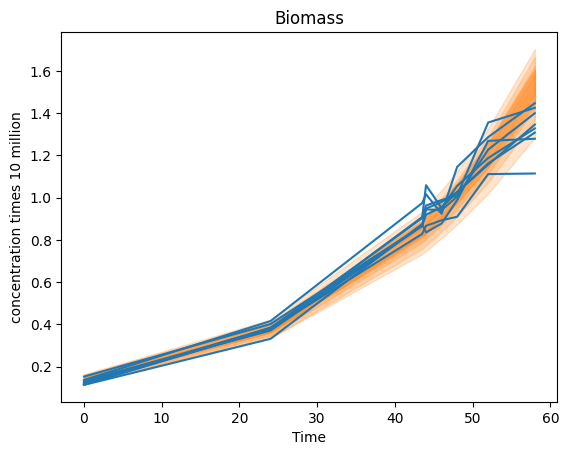

In [70]:
obs = ybiomass.set_index(["reactor", "time"])[["y"]].unstack("reactor")["y"]
t = idata.posterior["biomass"].quantile(0.5, dim=["chain", "draw"]).to_pandas()
low = idata.posterior["biomass"].quantile(0.1, dim=["chain", "draw"]).to_pandas()
high = idata.posterior["biomass"].quantile(0.9, dim=["chain", "draw"]).to_pandas()
low.index = high.index = obs.index
low.columns = high.columns = obs.columns

f, ax = plt.subplots()

lines = ax.plot(obs, color="tab:blue")
for reactor in low.columns:
    fill = ax.fill_between(low.index, low[reactor], high[reactor], color="tab:orange", alpha=0.2)
txt = ax.set(xlabel="Time", ylabel="concentration times 10 million", title="Biomass")




In [8]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [9]:
az.summary(idata, var_names="tyd", filter_vars="regex")



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tyd_reactor[0],0.342,0.115,0.172,0.540,0.002,0.002,3063.0,2494.0,1.0
tyd_reactor[1],2.514,0.485,1.634,3.404,0.010,0.007,2527.0,2672.0,1.0


In [10]:
t = idata.posterior["conc"].sel(conc_dim_2=0).mean(dim=["chain", "draw"]).to_pandas()
t

conc_dim_1,0,1,2,3,4,5,6,7
conc_dim_0,,,,,,,,
0,47.873753,47.342361,48.044268,48.365019,48.559032,48.448542,49.001951,48.747538
1,45.187033,44.442899,45.279662,45.708622,46.773398,46.688470,47.276671,47.114115
2,39.886846,38.932220,39.894908,40.620111,43.284993,43.245447,43.834778,43.885310
3,39.686645,38.727232,39.692587,40.430229,43.153760,43.115849,43.704162,43.763248
4,38.843028,37.865343,38.840692,39.631492,42.601086,42.570022,43.153390,43.248835
5,37.926479,36.932208,37.916279,38.766119,42.001194,41.977486,42.554355,42.689843
6,35.848794,34.828124,35.824658,36.812738,40.643251,40.635937,41.194195,41.422317
7,32.008686,30.973406,31.970770,33.227780,38.139355,38.161475,38.673346,39.078446


In [32]:
low

reactor,1,2,3,4,5,6,7,8
time,,,,,,,,
0.0,0.327610,0.272116,0.344013,0.392815,0.233878,0.189337,0.229300,0.229150
24.0,2.691808,2.938576,2.635125,2.543587,0.265550,0.209402,0.255626,0.252026
43.5,6.665276,7.425887,6.474390,6.076348,0.306474,0.236038,0.291428,0.288247
44.0,6.810716,7.590635,6.617971,6.204077,0.307843,0.236416,0.292367,0.289192
46.0,7.418724,8.281394,7.224020,6.725645,0.311052,0.239227,0.295570,0.293067
48.0,8.099758,9.024635,7.859965,7.288812,0.314237,0.241990,0.299329,0.297803
52.0,9.605413,10.708890,9.324712,8.566344,0.322319,0.247503,0.306880,0.304865
58.0,12.366430,13.771180,11.987680,10.881400,0.333126,0.256966,0.316942,0.314501


In [34]:
ax.fill_between?

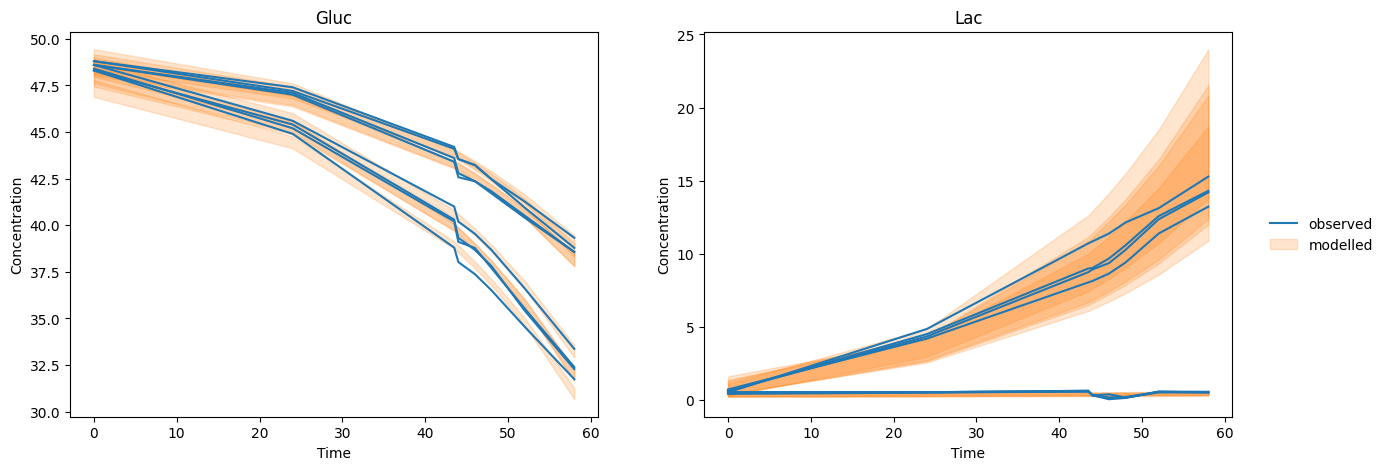

In [59]:
obs = yconc.set_index(["reactor", "time", "species"])["y"].unstack(["species", "reactor"])

f, axes = plt.subplots(1, 2, figsize=[15, 5])
for ax, i, species in zip(axes, [0, 1], obs.columns.get_level_values(0).unique()):
    low = idata.posterior["conc"].sel(conc_dim_2=i).quantile(0.1, dim=["chain", "draw"]).to_pandas()
    high = idata.posterior["conc"].sel(conc_dim_2=i).quantile(0.9, dim=["chain", "draw"]).to_pandas()
    low.index = high.index = obs.index
    low.columns = high.columns = obs[species].columns
    for reactor in low.columns:
        fill = ax.fill_between(low.index, low[reactor], high[reactor], color="tab:orange", alpha=0.2)
        lines = ax.plot(obs[species][reactor], color="tab:blue")
    ax.set(xlabel="Time", ylabel="Concentration", title=species.capitalize())
leg = f.legend([lines[0], fill], ["observed", "modelled"], frameon=False, loc="right")
    
    

In [12]:
az.summary(idata, var_names="yd", filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ayd_species[0],2.225,0.123,2.005,2.475,0.005,0.003,708.0,999.0,1.01
ayd_species[1],-0.430,0.972,-2.320,1.349,0.033,0.023,900.0,1178.0,1.00
"ayd_reactor[0, 0]",0.267,0.131,0.011,0.507,0.005,0.003,780.0,1134.0,1.01
"ayd_reactor[0, 1]",2.900,0.994,0.997,4.730,0.033,0.025,944.0,1129.0,1.00
"ayd_reactor[1, 0]",0.367,0.133,0.121,0.626,0.005,0.003,815.0,1274.0,1.01
"ayd_reactor[1, 1]",3.095,0.996,1.278,5.076,0.033,0.025,930.0,1152.0,1.00
"ayd_reactor[2, 0]",0.229,0.132,-0.027,0.474,0.005,0.003,841.0,1451.0,1.01
"ayd_reactor[2, 1]",2.816,1.003,0.968,4.754,0.033,0.025,935.0,1283.0,1.00
"ayd_reactor[3, 0]",0.174,0.131,-0.080,0.418,0.005,0.003,776.0,1118.0,1.01
"ayd_reactor[3, 1]",2.702,0.992,0.753,4.514,0.032,0.024,962.0,1206.0,1.00


In [13]:
az.summary(idata, var_names="yield", filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"yield[0, 0]",12.105,0.708,10.817,13.481,0.012,0.008,3694.0,3149.0,1.0
"yield[0, 1]",12.167,2.884,7.283,17.994,0.045,0.032,4094.0,3294.0,1.0
"yield[1, 0]",13.389,0.858,11.858,15.054,0.021,0.015,1735.0,2350.0,1.0
"yield[1, 1]",14.779,3.489,8.432,21.201,0.056,0.040,3705.0,2592.0,1.0
"yield[2, 0]",11.653,0.649,10.467,12.870,0.011,0.008,3566.0,3044.0,1.0
"yield[2, 1]",11.184,2.641,6.571,16.312,0.040,0.029,4215.0,3534.0,1.0
"yield[3, 0]",11.031,0.646,9.826,12.242,0.012,0.009,2846.0,3246.0,1.0
"yield[3, 1]",10.010,2.438,5.455,14.364,0.039,0.028,3920.0,3112.0,1.0
"yield[4, 0]",7.112,0.483,6.221,8.033,0.008,0.005,3912.0,3402.0,1.0
"yield[4, 1]",0.081,0.082,0.000,0.233,0.001,0.001,2487.0,2127.0,1.0


In [14]:
az.summary(idata, var_names="conc_0", filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"conc_0[0, 0]",47.874,0.335,47.215,48.482,0.005,0.004,4170.0,2987.0,1.0
"conc_0[0, 1]",0.763,0.458,0.161,1.575,0.007,0.006,5269.0,2884.0,1.0
"conc_0[1, 0]",47.342,0.354,46.670,48.011,0.006,0.004,3098.0,2708.0,1.0
"conc_0[1, 1]",0.642,0.455,0.119,1.300,0.010,0.009,4595.0,2747.0,1.0
"conc_0[2, 0]",48.044,0.333,47.403,48.630,0.005,0.003,4552.0,3119.0,1.0
"conc_0[2, 1]",0.761,0.444,0.145,1.515,0.007,0.006,4861.0,2772.0,1.0
"conc_0[3, 0]",48.365,0.327,47.724,48.970,0.005,0.004,3992.0,2879.0,1.0
"conc_0[3, 1]",0.911,0.570,0.204,1.872,0.010,0.009,4694.0,2844.0,1.0
"conc_0[4, 0]",48.559,0.331,47.952,49.202,0.005,0.004,4294.0,2847.0,1.0
"conc_0[4, 1]",0.339,0.086,0.186,0.506,0.001,0.001,3672.0,2380.0,1.0


In [15]:
az.summary(idata, var_names="sigma", filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma_ybiomass,0.097,0.011,0.078,0.117,0.000,0.000,2996.0,2536.0,1.0
sigma_yconc[0],0.010,0.001,0.008,0.012,0.000,0.000,2171.0,2650.0,1.0
sigma_yconc[1],0.539,0.057,0.439,0.646,0.001,0.001,3497.0,2711.0,1.0


In [ ]:
idata.posterior["tyd_reactor"].mean(dim=["chain", "draw"]).to_pandas()

tyd_reactor_dim_0
0    0.341632
1    2.513686
dtype: float64

In [ ]:
idata.posterior["ayd_reactor"].mean(dim=["chain", "draw"]).to_pandas()

ayd_reactor_dim_1,0,1
ayd_reactor_dim_0,,
0,0.266756,2.900097
1,0.367315,3.094778
2,0.228921,2.815952
3,0.173908,2.702078
4,-0.265628,-2.819257
5,-0.229212,-3.220674
6,-0.254019,-2.970865
7,-0.269166,-2.906848


In [ ]:
idata.posterior["ayd_reactor"].mean(dim=["chain", "draw"]).to_pandas()

ayd_reactor_dim_1,0,1
ayd_reactor_dim_0,,
0,0.266756,2.900097
1,0.367315,3.094778
2,0.228921,2.815952
3,0.173908,2.702078
4,-0.265628,-2.819257
5,-0.229212,-3.220674
6,-0.254019,-2.970865
7,-0.269166,-2.906848


In [20]:
idata.observed_data["y_species"]

KeyError: 'y_species'

In [ ]:
t = idata.posterior["yield"].mean(dim=["chain", "draw"]).to_pandas()
t
# t.index = pd.MultiIndex.from_frame(data.timecourse[["time", "reactor"]])
# t.unstack()

In [ ]:
idata.posterior["ayd_reactor"].mean(dim=["chain", "draw"])

In [ ]:
idata.posterior["species"].mean(dim=["chain", "draw"])[0][::8]

In [ ]:
data.timecourse["species_conc_gluc"][::8]

## Comparing in and out of sample log likelihoods

This cell uses arviz's [`compare`](https://arviz-devs.github.io/arviz/api/generated/arviz.compare.html) function to calculate the approximate leave-one-out expected posterior log predictive density for each inference.

It then calculates the average posterior in and out of sample log likelihoods.

In [ ]:
posterior_comparison = az.compare(idatas, var_name="llik")
posterior_comparison["mean_ll_posterior"], posterior_comparison["mean_ll_kfold"] = (
    pd.Series(
        {name: idata.log_likelihood[var].mean().values for name, idata in idatas.items()}, 
        dtype="float64"
    )
    for var in ["llik", "llik_kfold"]
)
posterior_comparison.apply(lambda s: s.round(3) if s.dtype == "float64" else s)

The 

In [ ]:
f, axes = plt.subplots(1, 3, figsize=[15, 5], sharex=True, sharey=True)

for ax, (name, idata) in zip(axes, idatas.items()):
    scatter = ax.scatter(
        idata.log_likelihood["llik"].mean(dim=["chain", "draw"]),
        idata.log_likelihood["llik_kfold"].mean(dim=["chain", "draw"]),
        s=5
    )
    line = ax.plot(ax.get_xlim(), ax.get_ylim(), color="red", zorder=0)
    text = ax.set(xlabel="In sample", ylabel="out of sample", title="Model: " + name)

suptitle = f.suptitle("Average posterior log likelihood")
legend = f.legend([scatter, line[0]], ["observation", "y=x"], frameon=False, loc="right")
f.savefig(os.path.join(PLOTS_DIR, "posterior_ll_comparison.png"))

Spot the model that was used to generate the "observed" data!

## Compare posterior predictive distributions

The last cell uses arviz to plot each posterior predictive distribution and saves the result to the `plots` directory.

In [ ]:
x = xarray.DataArray(np.linspace(0, 1, 100))
f, axes = plt.subplots(1, 3, figsize=[20, 5], sharey=True)
axes = axes.ravel()
for (name, idata), ax in zip(idatas.items(), axes):
        az.plot_lm(
            y="y",
            x=x,
            idata=idata,
            y_hat="yrep",
            axes=ax,
            kind_pp="hdi",
            y_kwargs={"markersize": 6, "color":"black"},
            grid=False
        )
        ax.legend(frameon=False)
        ax.set(title=name.replace("_", " ").capitalize(), ylabel="")
        ax.set_xticks([], [])
axes[0].set_ylabel("y")

suptitle = f.suptitle("Marginal posterior predictive distributions")
f.savefig(os.path.join(PLOTS_DIR, "posterior_predictive_comparison.png"))